# Automatas Celulares:

**Eduardo Carrasco Vidal**

## Creación de un Elementary Celular Automata (Unidimensional):

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import random

# determinamos el estado inicial en forma aleatoria, con valores binarios y rango (tamaño de la grilla)
def inicial_random(tamano):
    estado_inicial_r = [random.randint(0, 1) for _ in range(tamano)]
    return estado_inicial_r

In [66]:
# con esta función determinamos un estado inicial seteado al centro.
def inicial_seteado(tamano):
    # generamos una lista de 0 por el tamaño
    estado_inicial_s = [0] * tamano
    # con esto dejamos el del medio, divide la grilla en 2 y deja el del medio en 1
    estado_inicial_s[tamano // 2] = 1
    return estado_inicial_s

In [67]:
# Convierte un número de regla de Wolfram en un diccionario que mapea vecindarios de 3 células (width=3)
# a estados de células actualizados
def regla_binaria(numero_regla):
    #Consideramos como 8 el numero de digitos
    binario = np.binary_repr(numero_regla, width=8)
    # Generamos división de valores binarios de 3 (del 0 al 7), para asignarle un digito de la regla
    return {np.binary_repr(i, width=3): int(x) for i, x in enumerate(reversed(binario))}

In [68]:
# Aplica la regla anterior a cada generación
def siguiente_generacion(celdas, regla):
    celdas_ext = np.pad(celdas, pad_width=1, mode='wrap')
    vecindarios = [celdas_ext[i:i+3] for i in range(len(celdas))]
    vecindarios_str = [''.join(str(x) for x in vec) for vec in vecindarios]
    return np.array([regla[vec_str] for vec_str in vecindarios_str])

In [69]:
def automata_celular(numero_regla, n_generaciones, tamano, estado_inicial):
    regla = regla_binaria(numero_regla)
    generaciones = [estado_inicial]
    # Itera n_generaciones - 1 veces, ya que la primera generación es el estado inicial.
    for _ in range(n_generaciones - 1):
        #  Genera la siguiente generación del autómata celular utilizando la función 
        # siguiente_generacion con la última generación en la lista generaciones y el diccionario de reglas regla.
        nueva_gen = siguiente_generacion(generaciones[-1], regla)
        ## Añade la nueva generación a la lista de generaciones.
        generaciones.append(nueva_gen)
        #Devuelve una matriz que representa todas las generaciones del autómata celular. 
        #La función np.vstack apila verticalmente las listas en la lista generaciones para formar una matriz.
    return np.vstack(generaciones)

In [70]:
def visualizar_automata(automata):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    print(f"  Número de Regla de Wolfram: {numero_regla}")
    print(f"  Número de Generaciones: {n_generaciones}")
    print(f"  Tamaño de la grilla: {tamano}")
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    plt.show()

### Regla 30

  Número de Regla de Wolfram: 30
  Número de Generaciones: 100
  Tamaño de la grilla: 200


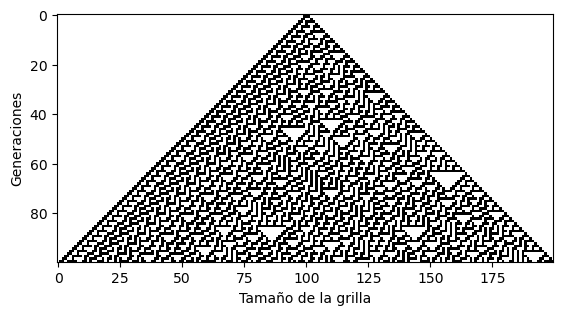

In [89]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 30
n_generaciones = 100
tamano = 200
estado_inicial = inicial_seteado(tamano) #random o seteado

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial)
visualizar_automata(automata)

In [90]:
automata[:,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 1, 1]])

In [91]:
## Representación binaria de la primera regla
## se puede usar para cualquier representación binaria
np.binary_repr(numero_regla, width=8)

'00011110'

### Regla 50:

  Número de Regla de Wolfram: 50
  Número de Generaciones: 1000
  Tamaño de la grilla: 2000


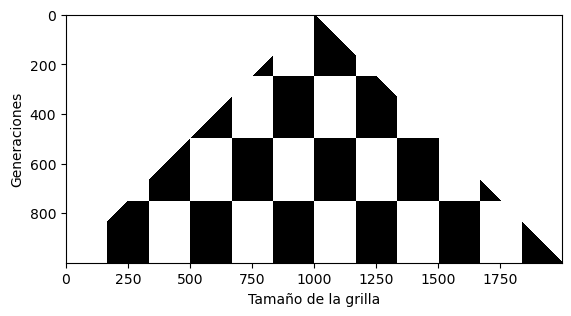

In [95]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 50
n_generaciones = 1000
tamano = 2000
estado_inicial = inicial_seteado(tamano)

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial)
visualizar_automata(automata)

### Regla 110:

  Número de Regla de Wolfram: 110
  Número de Generaciones: 100
  Tamaño de la grilla: 200


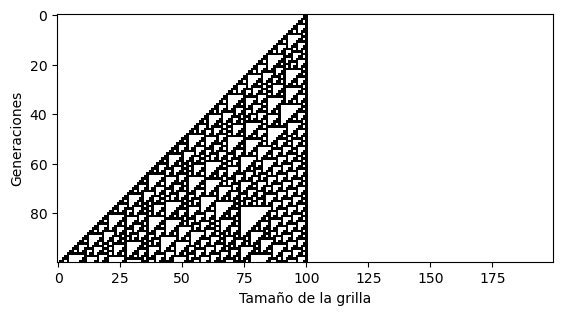

In [96]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 110
n_generaciones = 100
tamano = 200
estado_inicial = inicial_seteado(tamano)

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial)
visualizar_automata(automata)

### Regla 90:

  Número de Regla de Wolfram: 60
  Número de Generaciones: 100
  Tamaño de la grilla: 200


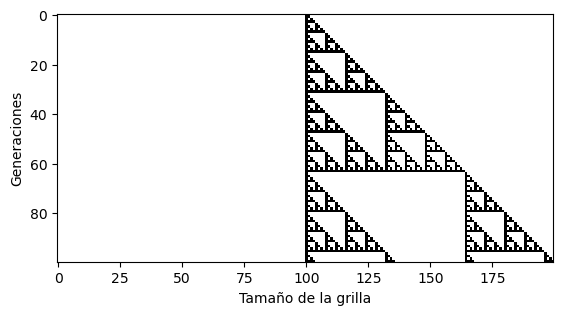

In [103]:
## Definición de condiciones para la simulación:
## se puede seleccionar random o seteado
numero_regla = 60
n_generaciones = 100
tamano = 200
estado_inicial = inicial_seteado(tamano)

automata = automata_celular(numero_regla, n_generaciones, tamano, estado_inicial)
visualizar_automata(automata)

## Creación de un Elementary Celular Automata (Bidimensional):

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import random

def init(size):
    return np.random.randint(0, 2, (size, size))

In [111]:
def apply_rule(cell, neighborhood_sum, rule_number):
    rule = f"{rule_number:08b}"
    index = 7 - neighborhood_sum
    return int(rule[index]) if cell else cell

In [112]:
def get_neighborhood(state, x, y, neighborhood_type):
    if neighborhood_type == 'Moore':
        return state[max(0, x-1):x+2, max(0, y-1):y+2].flatten()
    elif neighborhood_type == 'Neumann':
        return np.array([
            state[x, y], 
            state[x, max(0, y-1)], 
            state[x, min(y+1, state.shape[1]-1)], 
            state[max(0, x-1), y], 
            state[min(x+1, state.shape[0]-1), y]
        ])

In [113]:
def evolve(initial_state, rule_number, generations, neighborhood_type='moore'):
    state = initial_state.copy()
    history = [state]
    
    for _ in range(generations):
        new_state = state.copy()
        for x in range(state.shape[0]):
            for y in range(state.shape[1]):
                neighborhood = get_neighborhood(state, x, y, neighborhood_type)
                cell = state[x, y]
                neighborhood_sum = np.sum(neighborhood) - cell
                new_state[x, y] = apply_rule(cell, neighborhood_sum, rule_number)
        state = new_state
        history.append(state)
    
    return history

In [114]:
def print_automata(automata_bi, generation):
    plt.imshow(automata_bi, cmap='Greys', interpolation='nearest')
    print(f"  Tipo de Vecindario: {neighborhood_type}")
    plt.title(f"N° Generación {generation}")
    plt.show()

  Tipo de Vecindario: Neumann


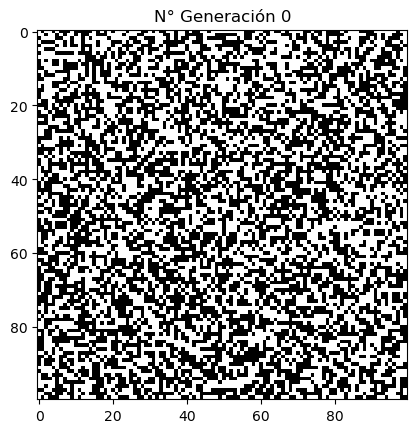

  Tipo de Vecindario: Neumann


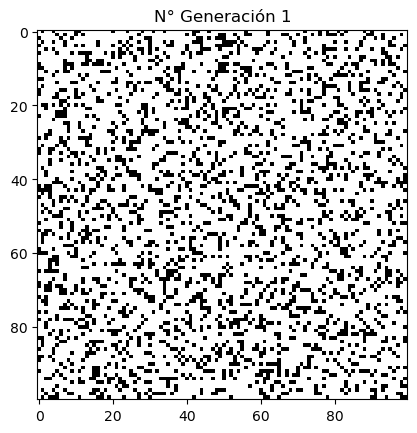

In [115]:
size = 100
rule_number = 10
generations = 1
neighborhood_type = 'Neumann'

initial_state = init(size)
history = evolve(initial_state, rule_number, generations, neighborhood_type)

for i, automata_bi in enumerate(history):
    print_automata(automata_bi, i)